## Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

** Important

Tingues en compte que prèviament et caldrà preparar el dataset.**

In [1]:
#Importem llibreries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

Informació sobre el dataset trobada a https://www.sciencedirect.com/science/article/pii/S2352340920305552

Descriu un conjunt de dades de valors separats per comes (CSV) format per 7050 publicacions de Facebook de diversos tipus (text, vídeos diferits i en directe, imatges). 
Aquestes publicacions es van extreure de les pàgines de Facebook de **10 venedors minoristes de moda i cosmètics tailandesos des de març de 2012 fins a juny de 2018.**
Els resultants  inclouen shares, comentaris i reaccions d'emoji en les quals distingim els "m'agrada" tradicionals de les reaccions d'emoji introduïdes recentment, que són "amor", "wow", "haha", "trist". ” i “enfadat”.

**Aquest conjunt de dades podria servir de base per a la investigació sobre la implicació del client amb el nou canal de venda que és Facebook Live, mitjançant estudis comparatius amb altres formes de contingut (text, vídeos diferits i imatges), així com l'anàlisi estadística de l'estacionalitat de compromís i publicacions atípiques.**

In [2]:
fbthai_data= pd.read_csv('Publicacions Facebook Thailandia.csv')
fbthai_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
fbthai_data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [4]:
fbthai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
fbthai_data.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
fbthai_data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

-Veig que la columna 1 a la 4 son buides i es podrien eliminar, però les utilitzaré per fer algunes columnes noves al dataset

---

In [7]:
# Separem la columna status_id en 2 post_id i id_user i la poso a la Column1 i 2 i els hi canvio el nom. 
fbthai_data[['Column1', 'Column2']] = fbthai_data['status_id'].str.split('_', expand=True)
fbthai_data = fbthai_data.rename(columns={'Column1': 'post_id', 'Column2': 'id_user'})
fbthai_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,post_id,id_user,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,1050855161656896,1061863470556065,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,1050855161656896,1061334757275603,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,1050855161656896,1060126464063099,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1050855161656896,1058663487542730,NaN,NaN


Ara separo la variable "status_published" en "day" i "hour" i les coloco a Column 3 i 4
Canvio el format de la columna a format dia i hora respectivament.

In [8]:
#1er separo la columna amb el espai
fbthai_data[['Column3', 'Column4']] = fbthai_data['status_published'].str.split(' ', expand=True)

fbthai_data = fbthai_data.rename(columns={'Column3': 'day', 'Column4': 'hour'})#canvio el nom a la columna
fbthai_data['day'] = pd.to_datetime(fbthai_data['day']) #Poso format de dia a la columna day

from datetime import datetime #Poso format hora a la columna hour
fbthai_data['hour'] = fbthai_data['hour'].apply(lambda x: datetime.strptime(x, '%H:%M').time())
fbthai_data.drop(columns = ['status_published', 'status_id'], inplace = True) #Elimino les columnes ja transformades
fbthai_data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,post_id,id_user,day,hour
0,video,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474,2018-04-22,06:00:00
1,photo,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757,2018-04-21,22:45:00
2,video,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397,2018-04-21,06:17:00
3,photo,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452,2018-04-21,02:29:00
4,photo,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,1050855161656896,1061863470556065,2016-09-24,02:58:00
7046,photo,16,0,0,14,1,0,1,0,0,1050855161656896,1061334757275603,2016-09-23,11:19:00
7047,photo,2,0,0,1,1,0,0,0,0,1050855161656896,1060126464063099,2016-09-21,23:03:00
7048,photo,351,12,22,349,2,0,0,0,0,1050855161656896,1058663487542730,2016-09-20,00:43:00


In [9]:
fbthai_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   status_type    7050 non-null   object        
 1   num_reactions  7050 non-null   int64         
 2   num_comments   7050 non-null   int64         
 3   num_shares     7050 non-null   int64         
 4   num_likes      7050 non-null   int64         
 5   num_loves      7050 non-null   int64         
 6   num_wows       7050 non-null   int64         
 7   num_hahas      7050 non-null   int64         
 8   num_sads       7050 non-null   int64         
 9   num_angrys     7050 non-null   int64         
 10  post_id        7050 non-null   object        
 11  id_user        7050 non-null   object        
 12  day            7050 non-null   datetime64[ns]
 13  hour           7050 non-null   object        
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 771.2+ KB


In [10]:
fbthai_data.duplicated().sum()

51

In [11]:
fbthai_datadup=fbthai_data[fbthai_data.duplicated()]
fbthai_datadup.head(20)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,post_id,id_user,day,hour
6221,video,376,20,3,354,19,3,0,0,0,819700534875473,1002372733274918,2018-06-10,03:43:00
6222,photo,255,7,4,249,6,0,0,0,0,819700534875473,1001982519980606,2018-06-09,22:53:00
6223,photo,1704,21,3,1685,15,2,2,0,0,819700534875473,1000607730118085,2018-06-07,07:01:00
6224,status,205,39,4,197,4,4,0,0,0,819700534875473,999880033524188,2018-06-06,02:20:00
6225,photo,336,42,2,285,5,0,0,46,0,819700534875473,998824716963053,2018-06-04,06:57:00
6226,status,111,2,1,110,1,0,0,0,0,819700534875473,997075427137982,2018-06-01,00:35:00
6227,photo,357,18,9,352,3,1,1,0,0,819700534875473,995933077252217,2018-05-30,06:33:00
6228,photo,114,7,0,109,3,2,0,0,0,819700534875473,995839410594917,2018-05-30,02:39:00
6229,status,133,7,1,127,6,0,0,0,0,819700534875473,995218893990302,2018-05-29,04:39:00
6230,photo,532,32,4,480,47,5,0,0,0,819700534875473,993975437447981,2018-05-27,01:31:00


Ens fixem que tots els duplicats son del mateix postId "819700534875473" . Analitzem algunes dades duplicades random i veiem que son totes el mateix dia i la mateixa hora, mateix nro de comments, likes, etc...

In [12]:
fbthai_data[fbthai_data.id_user == '995839410594917']

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,post_id,id_user,day,hour
6177,photo,114,7,0,109,3,2,0,0,0,819700534875473,995839410594917,2018-05-30,02:39:00
6228,photo,114,7,0,109,3,2,0,0,0,819700534875473,995839410594917,2018-05-30,02:39:00


In [13]:
fbthai_data[fbthai_data.id_user == '993602007485324']

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,post_id,id_user,day,hour
6180,status,231,16,2,216,3,0,0,12,0,819700534875473,993602007485324,2018-05-26,08:08:00
6231,status,231,16,2,216,3,0,0,12,0,819700534875473,993602007485324,2018-05-26,08:08:00


- Procedeixo doncs a eliminar els registres duplicats

In [14]:
fbthai_data = fbthai_data.drop_duplicates()
fbthai_data


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,post_id,id_user,day,hour
0,video,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474,2018-04-22,06:00:00
1,photo,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757,2018-04-21,22:45:00
2,video,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397,2018-04-21,06:17:00
3,photo,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452,2018-04-21,02:29:00
4,photo,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,1050855161656896,1061863470556065,2016-09-24,02:58:00
7046,photo,16,0,0,14,1,0,1,0,0,1050855161656896,1061334757275603,2016-09-23,11:19:00
7047,photo,2,0,0,1,1,0,0,0,0,1050855161656896,1060126464063099,2016-09-21,23:03:00
7048,photo,351,12,22,349,2,0,0,0,0,1050855161656896,1058663487542730,2016-09-20,00:43:00


In [15]:
fbthai_datagroup=fbthai_data.groupby('post_id').count().reset_index()
fbthai_datagroup

,post_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,id_user,day,hour
0,1050855161656896,778,778,778,778,778,778,778,778,778,778,778,778,778
1,117059915488335,56,56,56,56,56,56,56,56,56,56,56,56,56
2,134115277150304,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212
3,146481362756646,125,125,125,125,125,125,125,125,125,125,125,125,125
4,246675545449582,2635,2635,2635,2635,2635,2635,2635,2635,2635,2635,2635,2635,2635
5,614855718638584,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440
6,725980084255106,252,252,252,252,252,252,252,252,252,252,252,252,252
7,819700534875473,51,51,51,51,51,51,51,51,51,51,51,51,51
8,848451358648417,450,450,450,450,450,450,450,450,450,450,450,450,450


- Veiem que hi ha nomes 9 publicacions durant 6 anys per tant sospito que es un estudi de les interaccions d'aquests posts durant els 6 anys.
- Intento treure informació de les dades temporals, data i hora:

In [16]:
# Dummy encode 'post_id' column
dummies = pd.get_dummies(fbthai_data['post_id'], prefix='postid').astype('int64')

# Drop the original 'post_id' column
fbthai_data.drop('post_id', axis=1, inplace=True)

# Concatenate the dummy columns with the original DataFrame
fbthai_data1 = pd.concat([fbthai_data, dummies], axis=1)

# Display the updated DataFrame
fbthai_data1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,hour,postid_1050855161656896,postid_117059915488335,postid_134115277150304,postid_146481362756646,postid_246675545449582,postid_614855718638584,postid_725980084255106,postid_819700534875473,postid_848451358648417
0,video,529,512,262,432,92,3,1,1,0,...,06:00:00,0,0,0,0,1,0,0,0,0
1,photo,150,0,0,150,0,0,0,0,0,...,22:45:00,0,0,0,0,1,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,...,06:17:00,0,0,0,0,1,0,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,...,02:29:00,0,0,0,0,1,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,...,03:22:00,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,...,02:58:00,1,0,0,0,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0,...,11:19:00,1,0,0,0,0,0,0,0,0
7047,photo,2,0,0,1,1,0,0,0,0,...,23:03:00,1,0,0,0,0,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0,...,00:43:00,1,0,0,0,0,0,0,0,0


- Separo les dates per dies de cap de setmana i dies normalment laborables

In [17]:
fbthai_data1['Saturday'] = fbthai_data1['day'].dt.weekday.isin([5]).astype(int)
fbthai_data1['Sunday'] = fbthai_data1['day'].dt.weekday.isin([6]).astype(int)
fbthai_data1['Workday'] = (fbthai_data1['day'].dt.weekday < 5).astype(int)

fbthai_data1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,postid_134115277150304,postid_146481362756646,postid_246675545449582,postid_614855718638584,postid_725980084255106,postid_819700534875473,postid_848451358648417,Saturday,Sunday,Workday
0,video,529,512,262,432,92,3,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,photo,150,0,0,150,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,video,227,236,57,204,21,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,photo,111,0,0,111,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,photo,213,0,0,204,9,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7046,photo,16,0,0,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7047,photo,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7048,photo,351,12,22,349,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# separo les hores en periodes tipics de publicacions
def time_of_day(hour):
    if hour.hour >= 8 and hour.hour < 12:
        return 'morning'
    elif hour.hour >= 12 and hour.hour < 23:
        return 'afternoon/evening'
    else:
        return 'night'

fbthai_data1['time_day'] = fbthai_data1['hour'].apply(time_of_day)
#extrec l'any
fbthai_data1['year'] = fbthai_data1['day'].dt.year
fbthai_data1 = fbthai_data1.drop(['day', 'hour'], axis=1) #elimino les columnes dia i hora
fbthai_data1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,postid_246675545449582,postid_614855718638584,postid_725980084255106,postid_819700534875473,postid_848451358648417,Saturday,Sunday,Workday,time_day,year
0,video,529,512,262,432,92,3,1,1,0,...,1,0,0,0,0,0,1,0,night,2018
1,photo,150,0,0,150,0,0,0,0,0,...,1,0,0,0,0,1,0,0,afternoon/evening,2018
2,video,227,236,57,204,21,1,1,0,0,...,1,0,0,0,0,1,0,0,night,2018
3,photo,111,0,0,111,0,0,0,0,0,...,1,0,0,0,0,1,0,0,night,2018
4,photo,213,0,0,204,9,0,0,0,0,...,1,0,0,0,0,0,0,1,night,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,...,0,0,0,0,0,1,0,0,night,2016
7046,photo,16,0,0,14,1,0,1,0,0,...,0,0,0,0,0,0,0,1,morning,2016
7047,photo,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,night,2016
7048,photo,351,12,22,349,2,0,0,0,0,...,0,0,0,0,0,0,0,1,night,2016


In [19]:
fbthai_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status_type              6999 non-null   object
 1   num_reactions            6999 non-null   int64 
 2   num_comments             6999 non-null   int64 
 3   num_shares               6999 non-null   int64 
 4   num_likes                6999 non-null   int64 
 5   num_loves                6999 non-null   int64 
 6   num_wows                 6999 non-null   int64 
 7   num_hahas                6999 non-null   int64 
 8   num_sads                 6999 non-null   int64 
 9   num_angrys               6999 non-null   int64 
 10  id_user                  6999 non-null   object
 11  postid_1050855161656896  6999 non-null   int64 
 12  postid_117059915488335   6999 non-null   int64 
 13  postid_134115277150304   6999 non-null   int64 
 14  postid_146481362756646   6999 non-null  

-Miro si val la pena mantenir les dades temporals a nivell d'informació per dia de la setmana, any i post id:

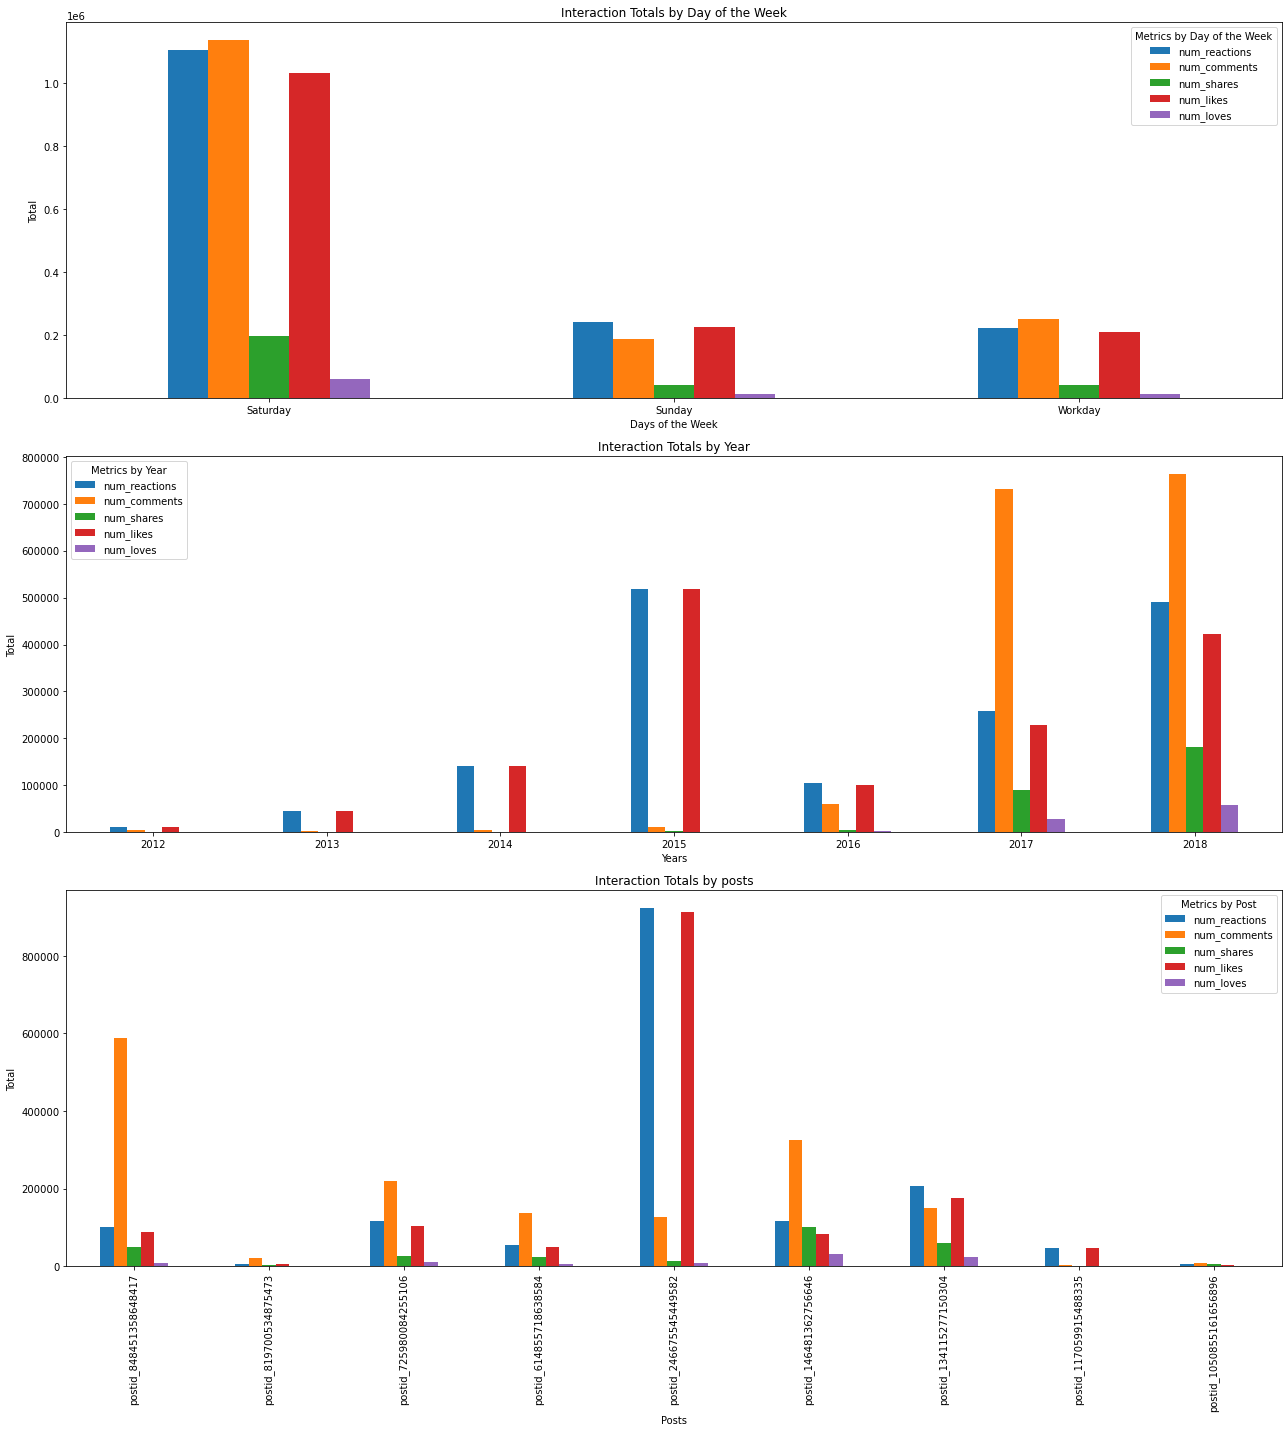

In [20]:
# Dades per al gràfic
dataday = fbthai_data1.groupby(['Saturday', 'Sunday', 'Workday'])[['num_reactions', 'num_comments', 'num_shares', 'num_likes','num_loves']].sum()
datayear = fbthai_data1.groupby('year')[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']].sum()
datapost = fbthai_data1.groupby(['postid_848451358648417', 'postid_819700534875473', 'postid_725980084255106', 'postid_614855718638584', 'postid_246675545449582', 'postid_146481362756646', 'postid_134115277150304', 'postid_117059915488335', 'postid_1050855161656896'])[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']].sum()
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 20))
#Generació del gràfic dia
dataday.plot(kind='bar', ax=axs[0])
axs[0].set_xticklabels(['Saturday', 'Sunday', 'Workday'], rotation=0)
axs[0].set_xlabel('Days of the Week')
axs[0].set_ylabel('Total')
axs[0].set_title('Interaction Totals by Day of the Week')
axs[0].legend(title='Metrics by Day of the Week')
# Generació del gràfic any
datayear.plot(kind='bar', ax=axs[1])
axs[1].set_xticklabels(datayear.index, rotation=0)
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Total')
axs[1].set_title('Interaction Totals by Year')
axs[1].legend(title='Metrics by Year')

# Generació del gràfic postid
datapost.plot(kind='bar', ax=axs[2])
axs[2].set_xticklabels(['postid_848451358648417','postid_819700534875473','postid_725980084255106','postid_614855718638584','postid_246675545449582','postid_146481362756646','postid_134115277150304','postid_117059915488335','postid_1050855161656896'], rotation=90)
axs[2].set_xlabel('Posts')
axs[2].set_ylabel('Total')
axs[2].set_title('Interaction Totals by posts')
axs[2].legend(title='Metrics by Post')
plt.tight_layout()
plt.show()

-Veiem que dissabte es el dia que hi ha moltes més interaccions que la resta de dies.
-Amb els anys veiem també que hi ha una evolució forta d'interaccions i sobretot de comentaris a partir del 2016 cap a endavant, amb el 2018 essent l'any on hi ha mes interaccions.
-La publicació postid_246675545449582 també concentra la majoria de les interaccions, per tant es important.


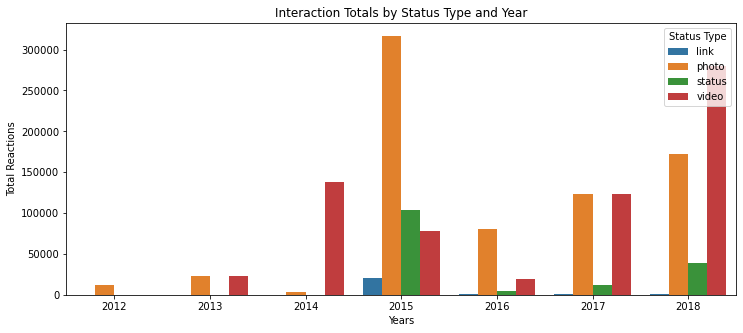

In [21]:
# Group data by status_type and calculate the sum of interaction metrics
data_status_year = fbthai_data1.groupby(['status_type', 'year'])[['num_reactions', 'num_comments', 'num_shares', 'num_likes']].sum()
data_status_year = data_status_year.reset_index()

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=data_status_year, x='year', y='num_reactions', hue='status_type', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Total Reactions')
ax.set_title('Interaction Totals by Status Type and Year')
plt.legend(title='Status Type')
plt.show()


- Veiem un comportament semblant amb el tipus de publicació durant els anys que el numero de interaccions. Incrementa a partir del 2015 fins el 2018, i hi ha un pic de fotos el 2015. 

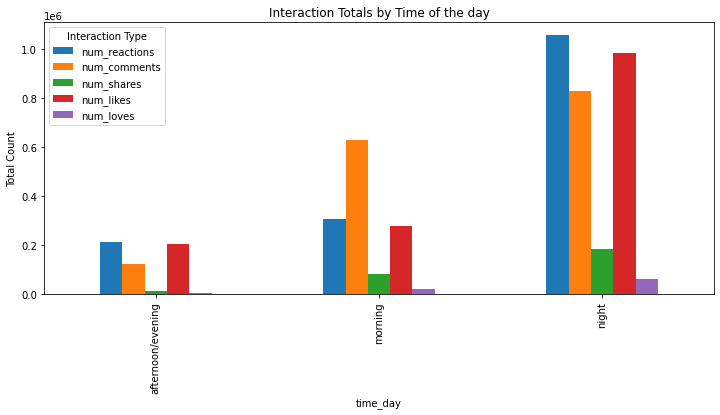

In [22]:
data_status_timeday = fbthai_data1.groupby('time_day')[['num_reactions', 'num_comments', 'num_shares', 'num_likes','num_loves']].sum()
data_status_timeday = data_status_timeday.reset_index()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 5))

# Generate the grouped bar plot
data_status_timeday.plot(kind='bar', x='time_day', y=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves'], ax=ax)
ax.set_ylabel('Total Count')
ax.set_title('Interaction Totals by Time of the day')
plt.legend(title='Interaction Type')

plt.show()

- Veiem que la majoria de les interaccions son a la nit (entre les 23h i les 8 del matí)



In [23]:
# Faig una copia de la base de dades per dumificar 
fbthai_data2 = fbthai_data1.copy()
# Converteixo variables categoriques a dummies numeriques 
fbthai_dum = pd.get_dummies(fbthai_data2, columns=["status_type", "time_day","year"], prefix=["media", "","year"], drop_first=True)
# Drop the original categorical columns
fbthai_data2.drop(['status_type', 'time_day','year'], axis=1, inplace=True)
fbthai_dum = fbthai_dum.astype('int64')
# Concatenate the dummy columns with the original DataFrame
fbthai_data2 = pd.concat([fbthai_dum], axis=1)

# Show the updated DataFrame
fbthai_data2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   num_reactions            6999 non-null   int64
 1   num_comments             6999 non-null   int64
 2   num_shares               6999 non-null   int64
 3   num_likes                6999 non-null   int64
 4   num_loves                6999 non-null   int64
 5   num_wows                 6999 non-null   int64
 6   num_hahas                6999 non-null   int64
 7   num_sads                 6999 non-null   int64
 8   num_angrys               6999 non-null   int64
 9   id_user                  6999 non-null   int64
 10  postid_1050855161656896  6999 non-null   int64
 11  postid_117059915488335   6999 non-null   int64
 12  postid_134115277150304   6999 non-null   int64
 13  postid_146481362756646   6999 non-null   int64
 14  postid_246675545449582   6999 non-null   int64
 15  post

In [24]:
#Elimino la variable id_user perque no aporta valor en el estudi
fbthaifinal_data = fbthai_data2.drop(['id_user'], axis=1)
fbthaifinal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   num_reactions            6999 non-null   int64
 1   num_comments             6999 non-null   int64
 2   num_shares               6999 non-null   int64
 3   num_likes                6999 non-null   int64
 4   num_loves                6999 non-null   int64
 5   num_wows                 6999 non-null   int64
 6   num_hahas                6999 non-null   int64
 7   num_sads                 6999 non-null   int64
 8   num_angrys               6999 non-null   int64
 9   postid_1050855161656896  6999 non-null   int64
 10  postid_117059915488335   6999 non-null   int64
 11  postid_134115277150304   6999 non-null   int64
 12  postid_146481362756646   6999 non-null   int64
 13  postid_246675545449582   6999 non-null   int64
 14  postid_614855718638584   6999 non-null   int64
 15  post

In [25]:
fbthaifinal_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,224.994571,452.880746,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.552079,892.743010,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.258608,132.046903,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.946707,439.550330,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.751536,40.106872,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.252893,8.725551,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.697957,3.970912,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.232605,1.481105,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.110159,0.688582,0.0,0.0,0.0,0.0,31.0
postid_1050855161656896,6999.0,0.111159,0.314351,0.0,0.0,0.0,0.0,1.0


In [26]:
fbthaifinal_data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,postid_1050855161656896,...,media_status,media_video,_morning,_night,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,529,512,262,432,92,3,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,227,236,57,204,21,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,213,0,0,204,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0



L'anàlisi de les variables d'interacció revela una alta dispersió dels seus valors. S'observa una gran variabilitat entre els quartils, indicant que no hi ha un creixement proporcional entre aquests valors. A més, la desviació estàndard és notablement alta, suggerint la presència d'observacions anòmales o outliers en les dades. Això també ens permet observar els valors mínims i màxims de les diferents variables numèriques, evidenciant una àmplia gamma de valors. Cal destacar que en aquest cas, la gran variació en aquests valors no hauria de ser sorprenent, ja que les reaccions són subjectives i és perfectament possible trobar valors mínims de 0 i màxims de 4710, per exemple, com succeeix amb les interaccions "likes".


- Variables time_day(mati, tarda, nit) 
- status_type (foto,video, link, share) podria ser la variable target per la que voldriem fer prediccions pero també podria ser target post_id ja que hem vist que nomes hi ha 9 publicacions, pero a priori no tenim una variable target definida, per tant estem davant d'un problema d'aprenantge **NO supervisat**
- Saturday, Sunday, Workday està feta la dumificació a 0 i 1.
- Variables de temps: year, la convertiré en numérica per poder executar el K-means 
- Variables numérica: num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads i num_agrys.
- 6999 registres (filas), 31 variables (columnes).
- Per el estudi es tindràn en compte les seguents variables:
- Numériques: num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads i num_angrys.
- Els post_id els consideraré també com a categòriques ja que es un index de 9 posts
- Fem una representació gràfica de les variables numeriques (no booleanes)

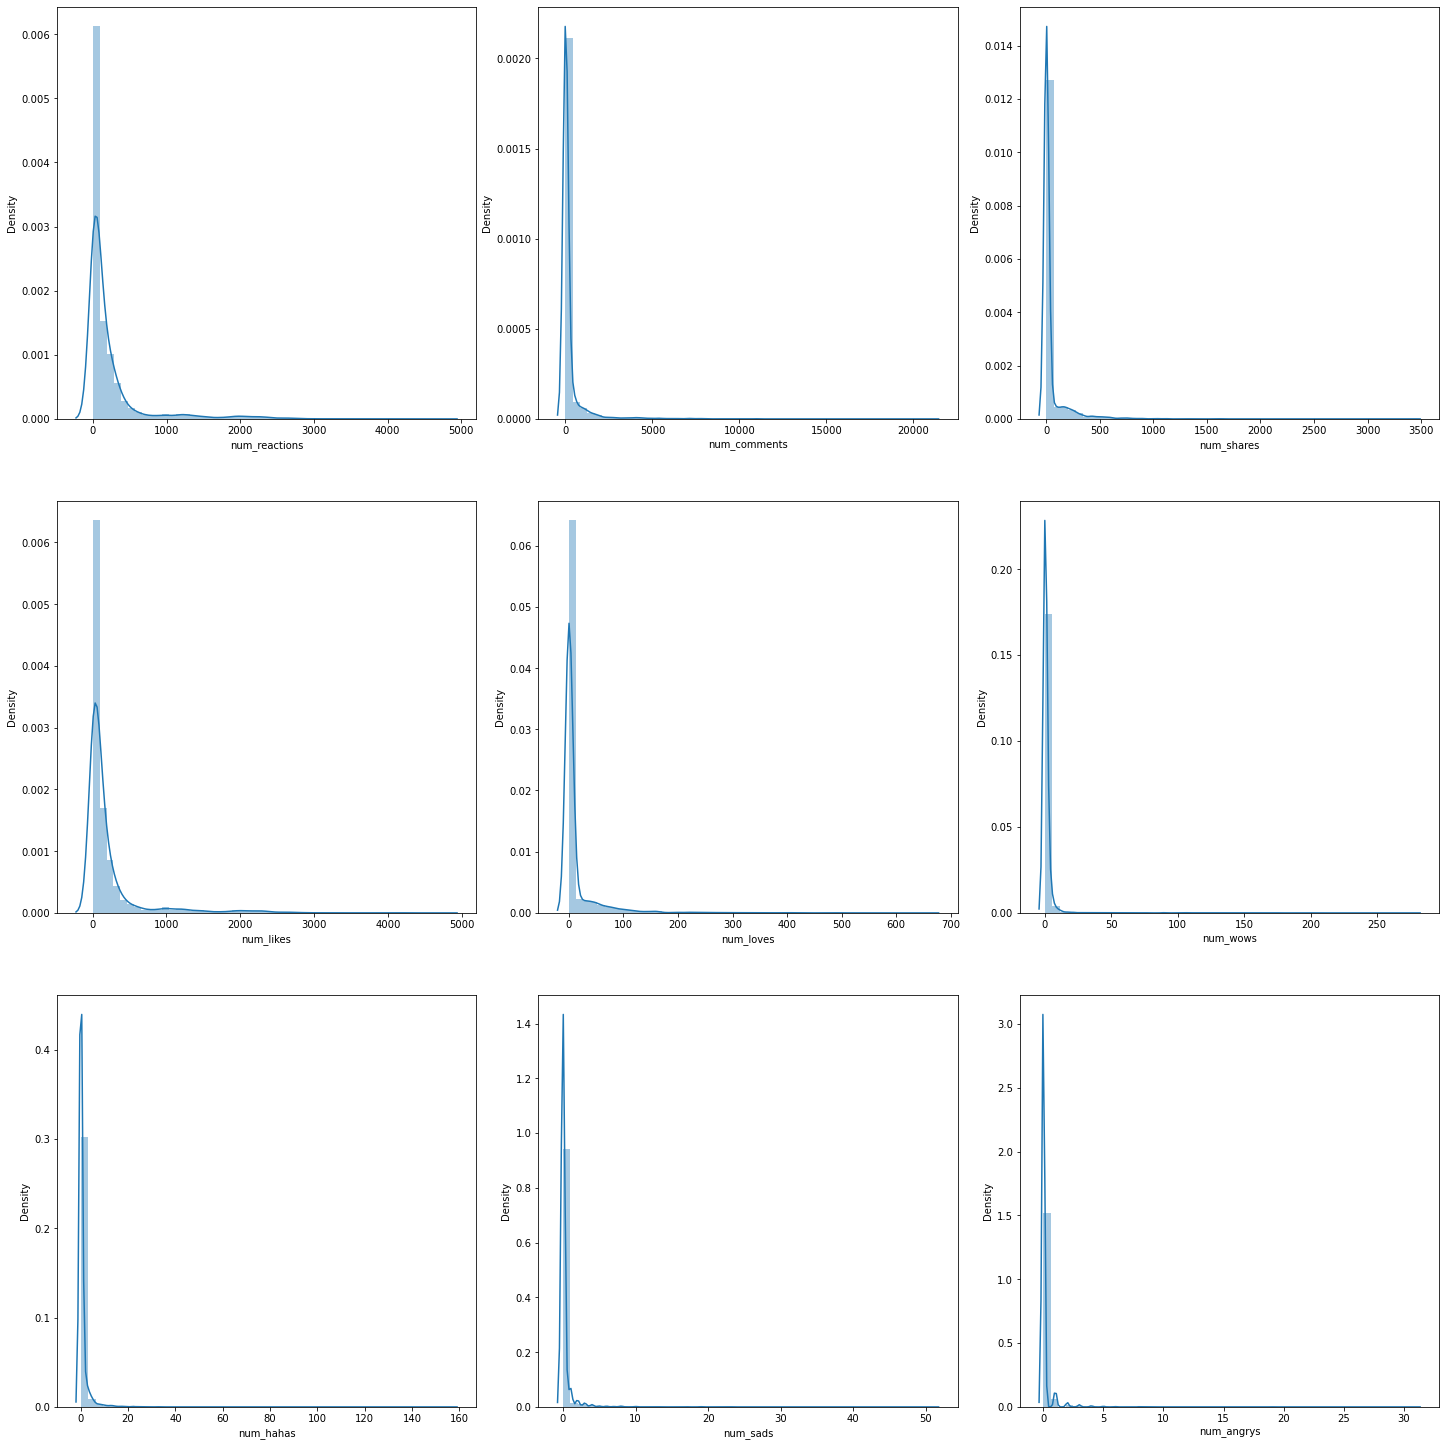

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
num_columns = [col for col in fbthaifinal_data.columns if col.startswith('num_')][:9]

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over the num_columns and plot the distribution for each column
for i, col in enumerate(num_columns):
    sns.distplot(fbthaifinal_data[col], ax=axs[i])

# Adjust the layout
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.show()


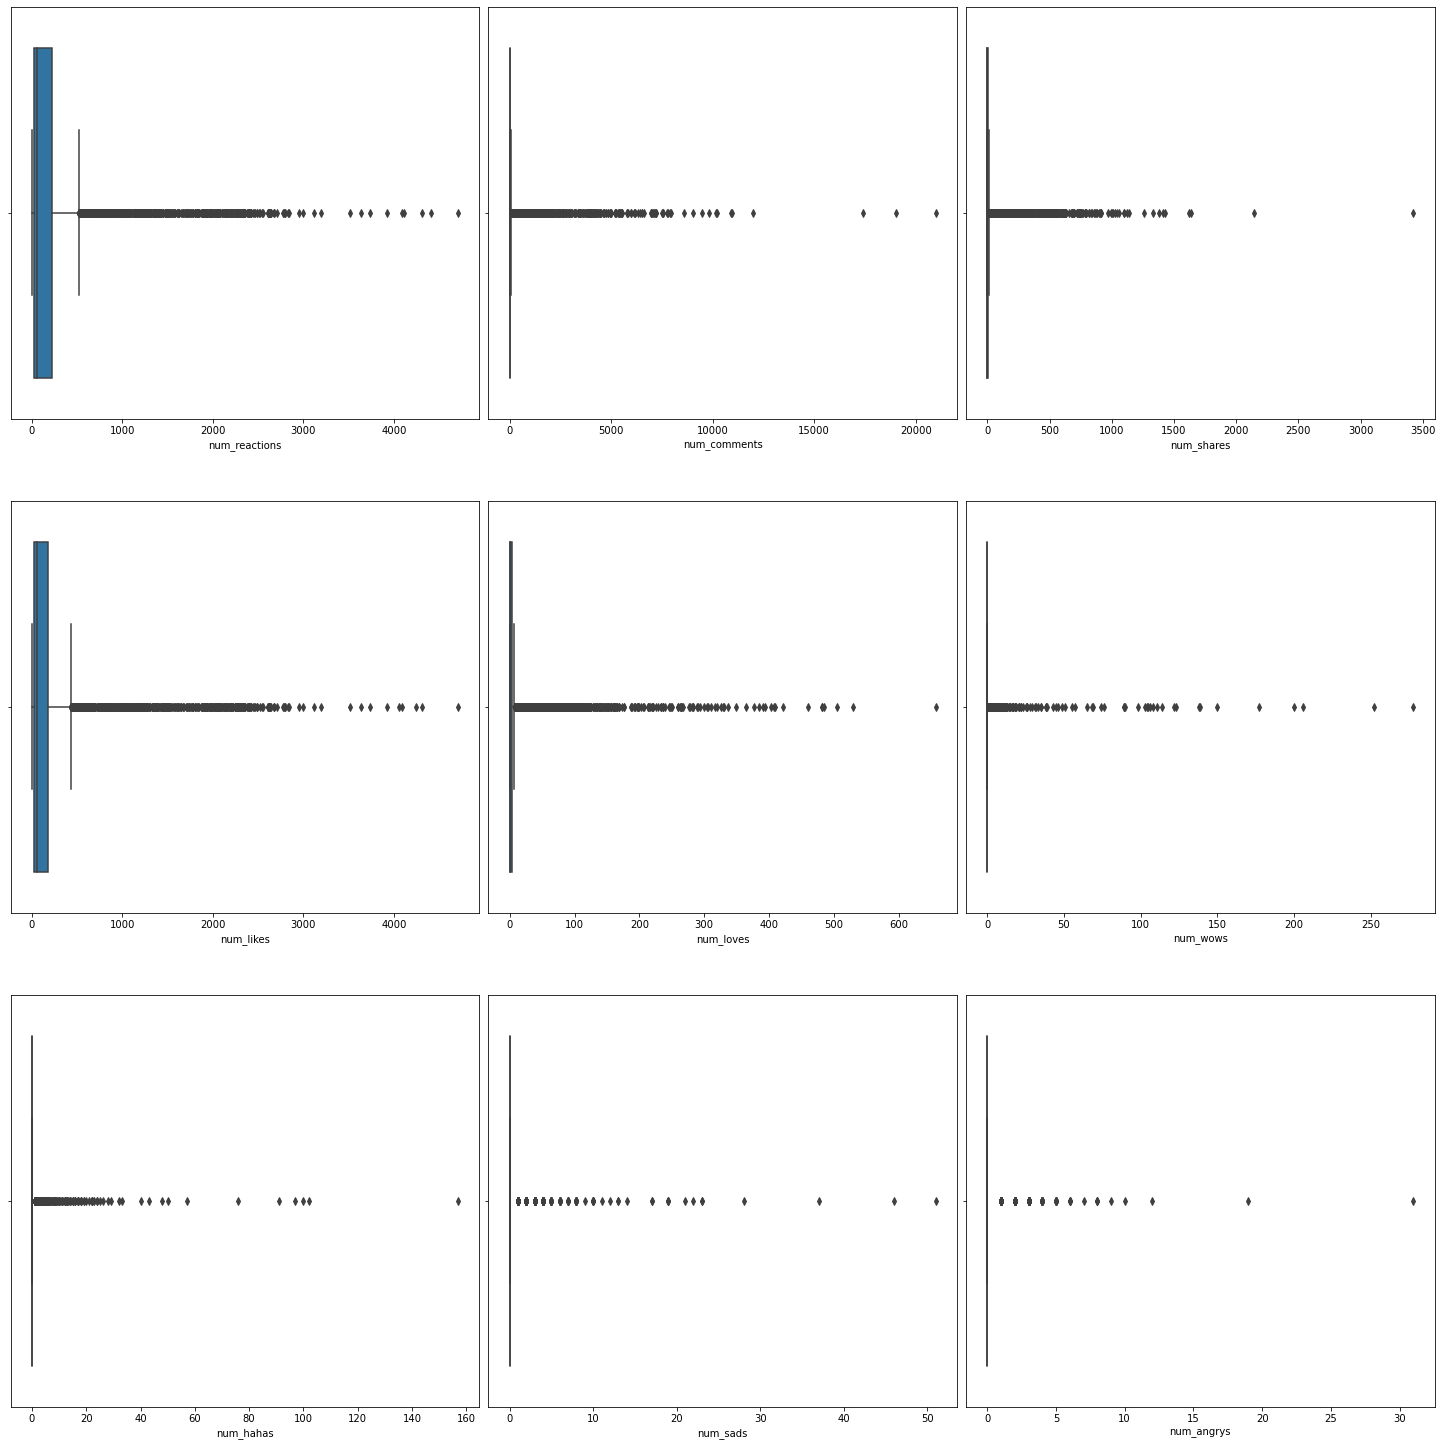

In [28]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
num_columns = [col for col in fbthaifinal_data.columns if col.startswith('num_')][:9]

axs = axs.flatten()
for i, col in enumerate(num_columns):
    sns.boxplot(fbthaifinal_data[col], ax=axs[i])
   
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Es pot veure gràficament que totes aquestes variables no son gausianes i tenen outliers, però farem
l'estudi de la hipotesi de Shapiro per comprovar.
Les variables categoriques ja les hem convertit en dummies i per tant ja les tenim escalades entre 0 i 1 i no cal fer cap altre preprocessat

In [29]:
from scipy import stats
for i in num_columns:
    shapiro_test = stats.shapiro(fbthaifinal_data[i])
    print('La variable', i, "te un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("No podem rebutjar hipòtesi nul.la, la distribució es normal (probable gausiana)")
    else:
        print("Podem rebutjar la hipòtesi nul.la, la distribució no es normal (probable no gausiana)")

La variable num_reactions te un p-value de  0.0
Podem rebutjar la hipòtesi nul.la, la distribució no es normal (probable no gausiana)
La variable num_comments te un p-value de  0.0
Podem rebutjar la hipòtesi nul.la, la distribució no es normal (probable no gausiana)
La variable num_shares te un p-value de  0.0
Podem rebutjar la hipòtesi nul.la, la distribució no es normal (probable no gausiana)
La variable num_likes te un p-value de  0.0
Podem rebutjar la hipòtesi nul.la, la distribució no es normal (probable no gausiana)
La variable num_loves te un p-value de  0.0
Podem rebutjar la hipòtesi nul.la, la distribució no es normal (probable no gausiana)
La variable num_wows te un p-value de  0.0
Podem rebutjar la hipòtesi nul.la, la distribució no es normal (probable no gausiana)
La variable num_hahas te un p-value de  0.0
Podem rebutjar la hipòtesi nul.la, la distribució no es normal (probable no gausiana)
La variable num_sads te un p-value de  0.0
Podem rebutjar la hipòtesi nul.la, la di

Per la tipologia de les dades, hi ha moltes reaccions a les publicacions, nul.les es a dir amb valor 0. Comprovem doncs que aquestes variables son no gausianes i tenen molts outliers. 

In [30]:
# Robust Scaler 
Robust_scaler = preprocessing.RobustScaler().fit(fbthaifinal_data[num_columns])
fbthaifinal_data[num_columns] = Robust_scaler.transform(fbthaifinal_data[num_columns])

# Show how is it looks like now df
fbthaifinal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_reactions            6999 non-null   float64
 1   num_comments             6999 non-null   float64
 2   num_shares               6999 non-null   float64
 3   num_likes                6999 non-null   float64
 4   num_loves                6999 non-null   float64
 5   num_wows                 6999 non-null   float64
 6   num_hahas                6999 non-null   float64
 7   num_sads                 6999 non-null   float64
 8   num_angrys               6999 non-null   float64
 9   postid_1050855161656896  6999 non-null   int64  
 10  postid_117059915488335   6999 non-null   int64  
 11  postid_134115277150304   6999 non-null   int64  
 12  postid_146481362756646   6999 non-null   int64  
 13  postid_246675545449582   6999 non-null   int64  
 14  postid_614855718638584  

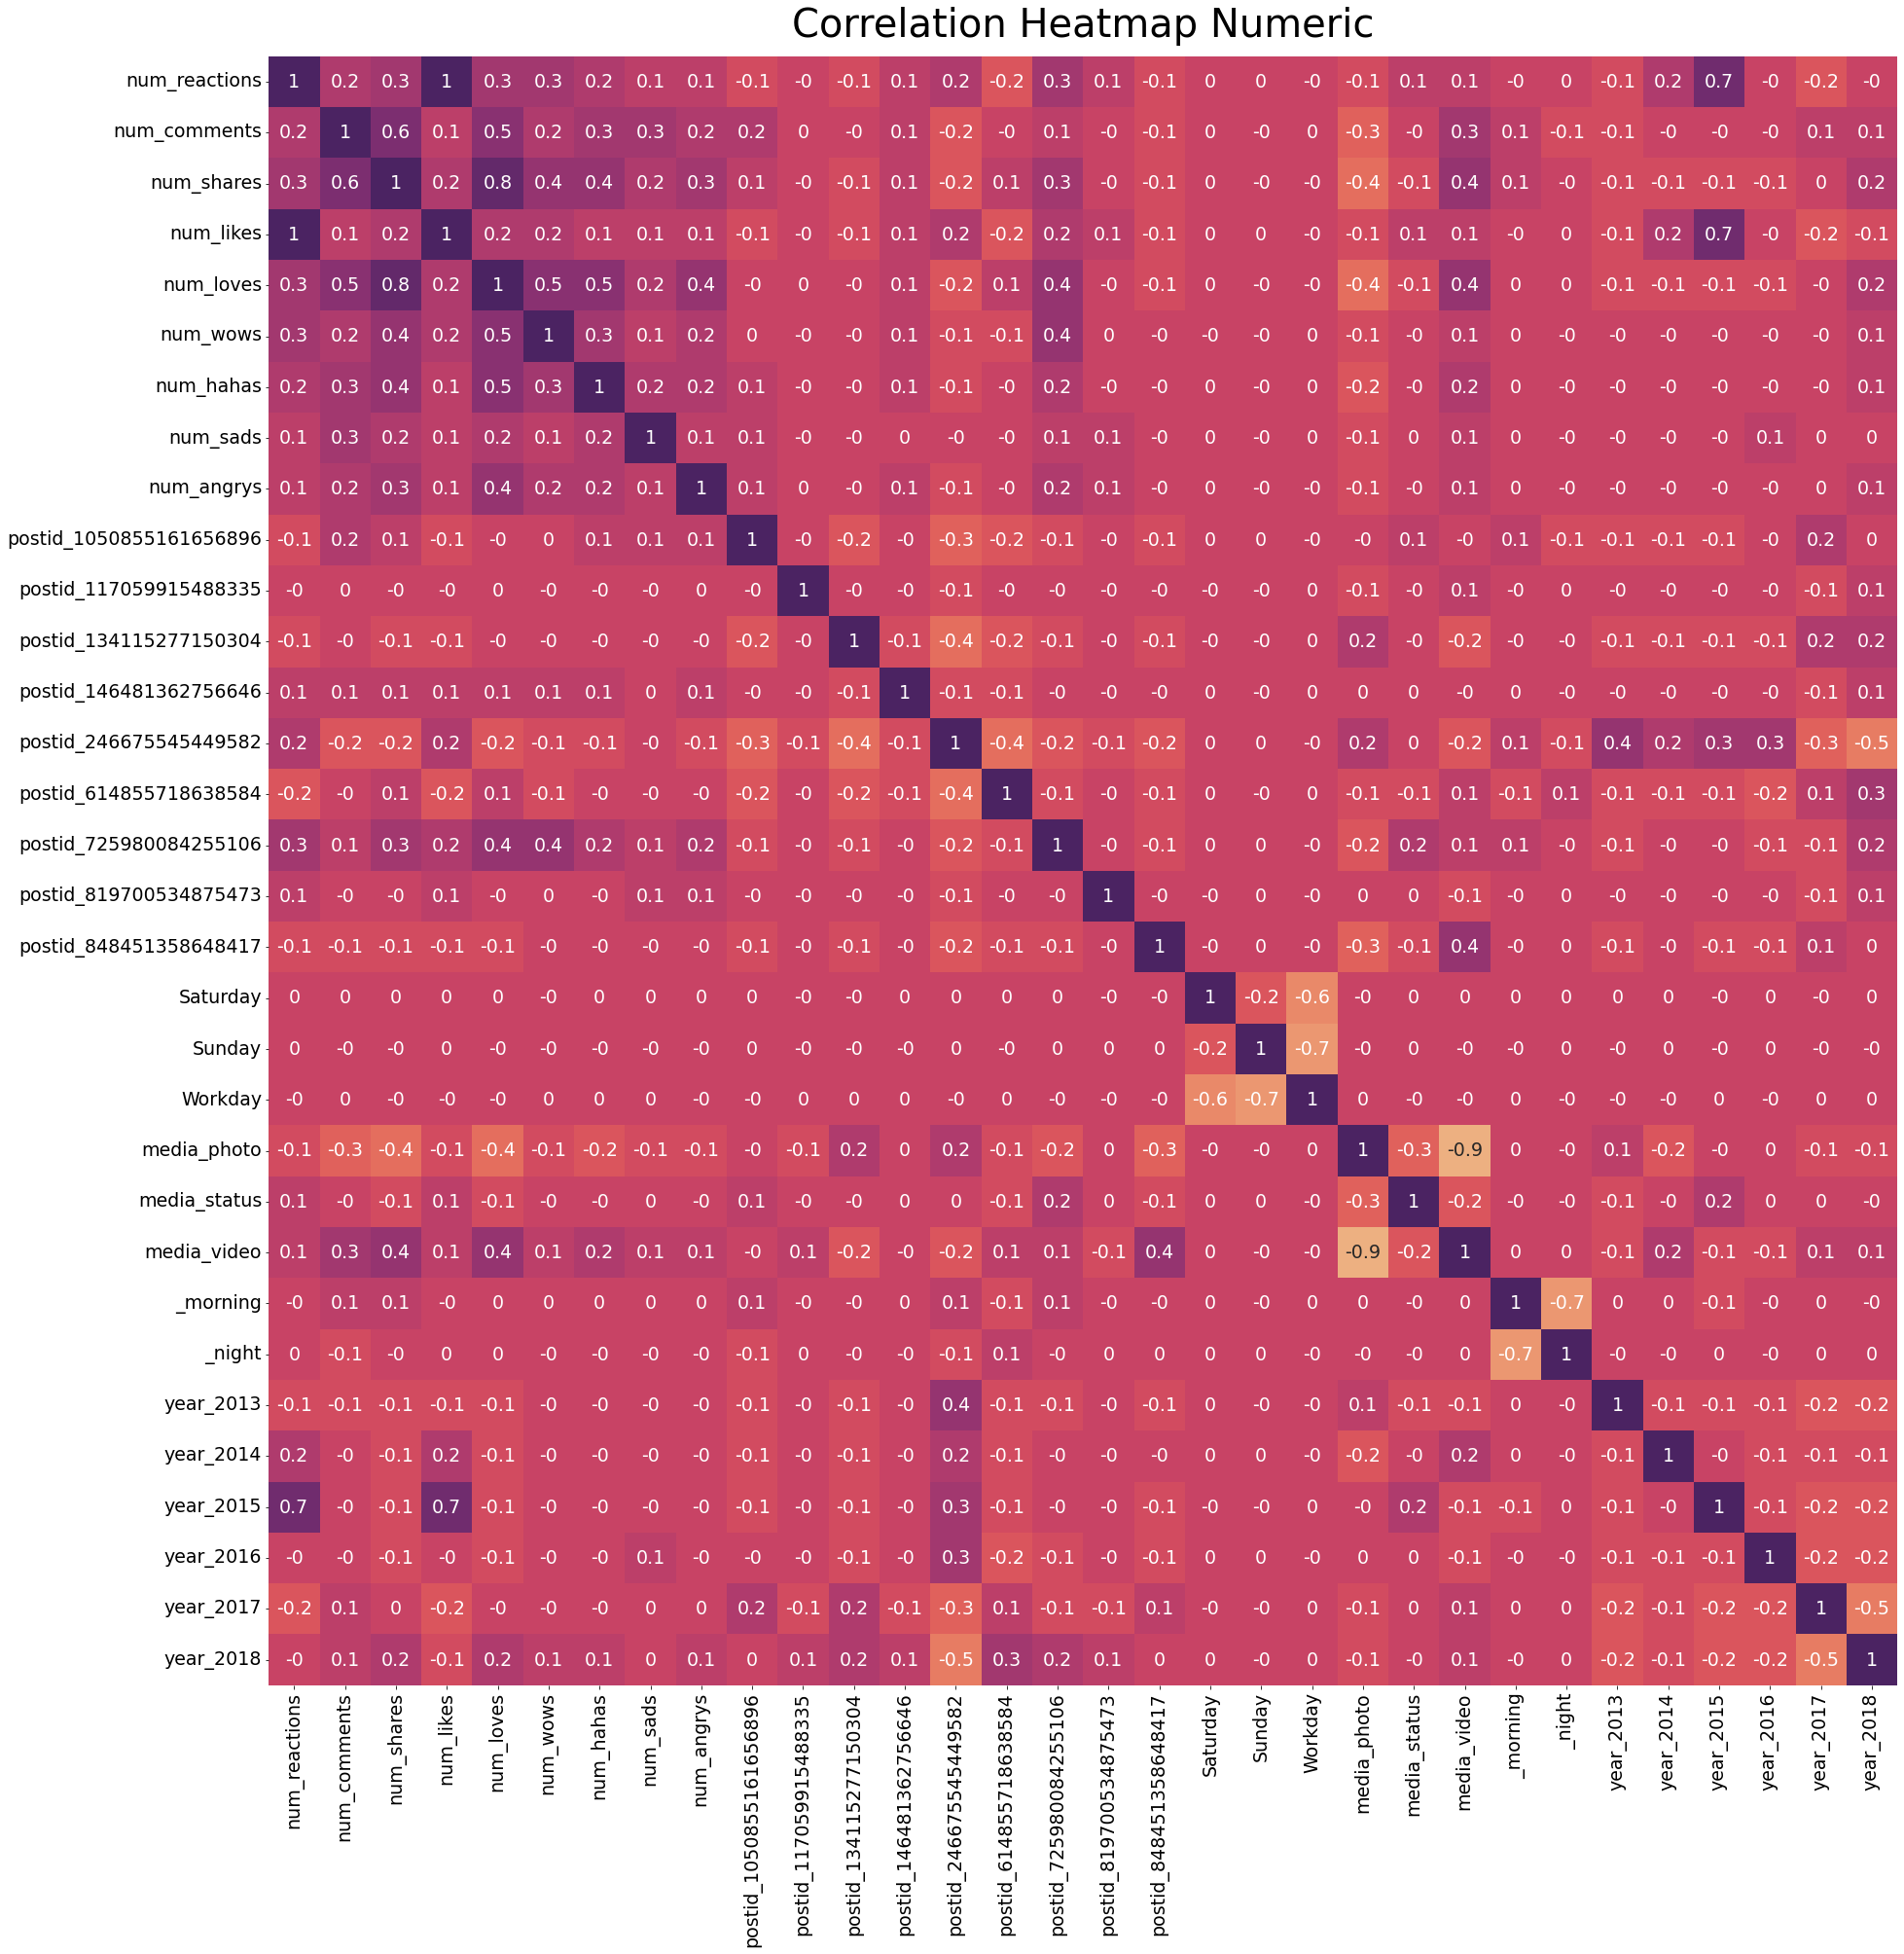

In [31]:
plt.figure(figsize=(30, 40))

# Increase font size for variable names
xticklabels_fontsize = 19
yticklabels_fontsize = 19
annot_fontsize = 19

# Generate the correlation matrix
corr_matrix = fbthaifinal_data.corr().round(1)

# Plot the heatmap with adjusted font sizes
sns.heatmap(corr_matrix, annot=True, cmap="flare", annot_kws={'fontsize': annot_fontsize},
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            cbar=False, square=True)

# Set x-axis labels font size
plt.xticks(fontsize=xticklabels_fontsize)

# Set y-axis labels font size
plt.yticks(fontsize=yticklabels_fontsize)

# Increase title font size
title_fontsize = 40
plt.title('Correlation Heatmap Numeric', fontsize=title_fontsize, pad=20)

plt.show()

- He fet 2 matrius de correlació perque hi ha variables com els any 2015 si que tenen mes correlació amb interaccions com reactions i likes.Tantmateix el postid_146481362756646 i postid_725980084255106 ha tingut lleugera correlació amb el nombre de publicacions entre el 2012 i 2016.
- En el heatmap numeric podem observar multicolinealitat clara entre les variables num_reactions i num likes, al haver-hi molta correlació entre elles.

Text(0.5, 1.0, 'Correlation Heatmap numeric ')

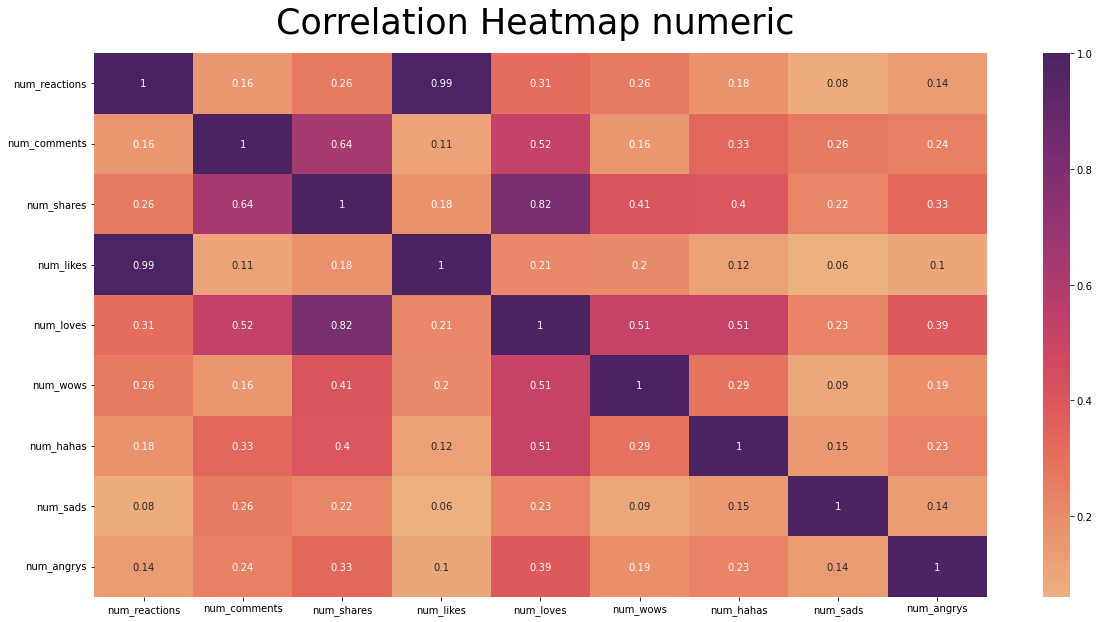

In [32]:
# Correlation heatmap plot
plt.figure(figsize=(20,10))
sns.heatmap(fbthaifinal_data[num_columns].corr().round(2), annot=True, cmap="flare")
plt.title('Correlation Heatmap numeric ', fontsize=35, pad=20)

### PCA

L'anàlisi de components principals (PCA, Principal Component Analysis) és una tècnica d'anàlisi de dades que es fa servir per reduir la dimensionalitat del conjunt de dades, mantenint la major part de la seva informació rellevant. PCA busca trobar les combinacions lineals òptimes de les variables originals per crear noves variables anomenades components principals. Apliquem el PCA només a les variables numeriques, no a les dummies.

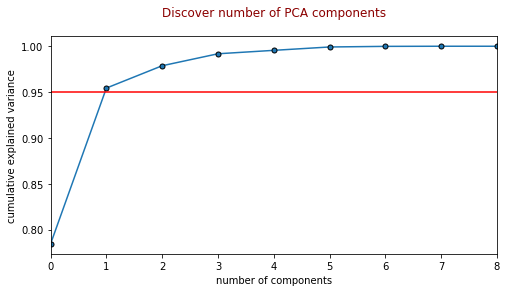

In [33]:
# import libraries to apply PCA method
from sklearn.decomposition import PCA


# Create a plot to see how many PC will be optim to use
pca = PCA().fit(fbthaifinal_data[num_columns])
plt.figure(figsize = (8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o", markersize=5, markeredgecolor='black')
plt.axhline(0.95, color = "r", linestyle = "-")
plt.xlim([0, 8])
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");
plt.title("Discover number of PCA components", fontsize=12, pad=20, color='darkred')
plt.show()

In [34]:
# Call pca method with n_components = 3 and fit it
pca = PCA(n_components=3)
pca.fit(fbthaifinal_data[num_columns])

# Show % of the cumulative explained variancec we will keep with 2 PC. 
np.cumsum(pca.explained_variance_ratio_)

array([0.78433741, 0.95436248, 0.97873025])

 Per tant podem comprovar que amb n_components = 2 és suficient ja que així supera el 95% de la informació recollida que es la marca estandard. Un major número de PCs ens aportaria més precisió pero ens podria allargar innecessariament la complexitat dels models a utilitzar alhora de buscar patrons
 Amb la reducció de la dimensionalitat, es pot simplificar la complexitat de les dades i facilitar-ne la interpretació.


El resultat de la matriu anterior ens indica quin % de informació cada PC reté de les dades originals recullides en la cumulative explained variance Per tant podem comprovar que amb n_components = 2 és suficient ja que així supera el 95% de la informació recollida que es la marca estandard. Un major número de PCs ens aportaria més precisió pero ens podria allargar innecessariament la complexitat dels models a utilitzar alhora de buscar patrons_

In [35]:
#Apliquem PCA nomes a 2 components
pca = PCA(n_components=2)
pca.fit(fbthaifinal_data[num_columns])#aplico nomes a les dades numeriques no dumificades

# fit and transform our dataset with PCA info
fb_thai_pca = pd.DataFrame(pca.transform(fbthaifinal_data[num_columns]), columns=["PC1", "PC2"], index=fbthaifinal_data.index)

# Show the result of the new dataframe with nearly all the original data. 
fb_thai_pca.head(10)

,PC1,PC2
0,48.141927,39.279885
1,-14.873807,-2.241151
2,3.371249,3.438150
3,-14.877890,-2.247779
4,-14.268106,-1.394616
5,-14.265522,-1.785091
6,22.836988,1.436698
7,11.237777,-2.367467
8,-14.499892,-1.796032
9,-14.205475,-2.034295


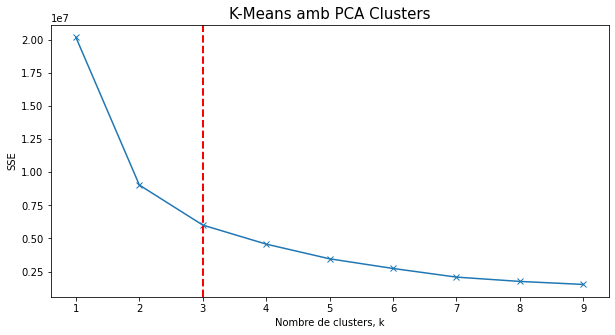

In [36]:
from sklearn.cluster import KMeans
ks = range(1, 10)
# SSE es (Sum of Squared errors)
SSE = []

for i in range(1, 10):
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=i, random_state= 35)
    
    # Fit model to samples
    kmeans.fit(fb_thai_pca)
    
    # Append the inertia to the list of inertias
    SSE.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))    
plt.plot(ks, SSE, '-o', marker='x')
plt.axvline(x = 3, ymin = 0, color = 'red', linewidth =2, ls = '--' )
plt.xlabel('Nombre de clusters, k')
plt.ylabel('SSE')
plt.title('K-Means amb PCA Clusters', fontsize=15)
plt.xticks(ks)
plt.show()

In [37]:
from kneed import KneeLocator
kl = KneeLocator(ks, SSE, curve="convex", direction="decreasing")
print('Nombre óptim de clusters (k):', kl.elbow)

Nombre óptim de clusters (k): 3


Confirmem amb la llibreria kneelocator que el nombre óptim de clusters és 3,coincidint amb l'elbow plot SSE.

In [38]:
## Inicialitzo de nou el Kmeans clustering nomes amb 3 clusters, pero amb el mateix seed 35:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 35)

##Fit the kmeans to the data to find the clusters
kmeans_pca.fit(fb_thai_pca)

KMeans(n_clusters=3, random_state=35)

### K-Means model estudi de paràmetres

In [39]:
# Predict to assign each 
y_pred = kmeans_pca.predict(fb_thai_pca)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [40]:
kmeans_pca.cluster_centers_

array([[-11.09640558,  -1.20190561],
       [100.1754256 ,  25.01590237],
       [335.02713119, -56.96723379]])

- L'algoritme KMeans agrupa les dades intentant separar mostres en n grups de variàncies iguals, minimitzant un criteri conegut com a inèrcia, es pot reconèixer com una mesura de la coherència interna dels clústers.
- L'algoritme de k-means divideix un conjunt de N mostres X en K grups C disjunts, cadascun descrit per la mitjana j de les mostres del clúster. Les mitjanes s'anomenen comunament els centroides del clúster.
- L'algoritme de K-means té com a objectiu triar els centroides que minimitzin la inèrcia, o la suma dins del clúster del criteri al quadrat.

In [41]:
kmeans_pca.inertia_

6010616.864025468

He llegit el seguent:"The lesser the model inertia, the better the model fit.
We can see that the model has very high inertia. So, this is not a good model fit to the data." Però en el nostre cas, es possible per l'alta presència d'outliers: Si tens outliers en les teves dades, aquests punts atípics poden influir en la inèrcia total. Els outliers, per la seva naturalesa, estan allunyats dels altres punts, el que provoca un augment en la inèrcia.

Per veure com es comporta agafem el dataframe original (sense escalar ni dummificar) i crearem una funció que iteri només sobre les variables númeriques)

In [42]:
# Create new column with the cluster assgined for each instance
fbthai_data1['clusterkm'] = y_pred

#Show first rows
fbthai_data1.head()


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,postid_614855718638584,postid_725980084255106,postid_819700534875473,postid_848451358648417,Saturday,Sunday,Workday,time_day,year,clusterkm
0,video,529,512,262,432,92,3,1,1,0,...,0,0,0,0,0,1,0,night,2018,1
1,photo,150,0,0,150,0,0,0,0,0,...,0,0,0,0,1,0,0,afternoon/evening,2018,0
2,video,227,236,57,204,21,1,1,0,0,...,0,0,0,0,1,0,0,night,2018,0
3,photo,111,0,0,111,0,0,0,0,0,...,0,0,0,0,1,0,0,night,2018,0
4,photo,213,0,0,204,9,0,0,0,0,...,0,0,0,0,0,0,1,night,2018,0


In [43]:
fbthai_data1['clusterkm'].value_counts()

0    6452
1     475
2      72
Name: clusterkm, dtype: int64

- Podem veure que dels 3 clusters el que obté mes resultats es el primer.Però podem fer un petit estudi amb les variables numèriques:

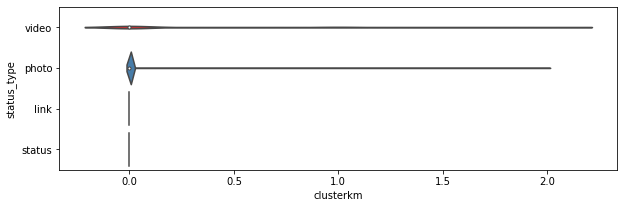

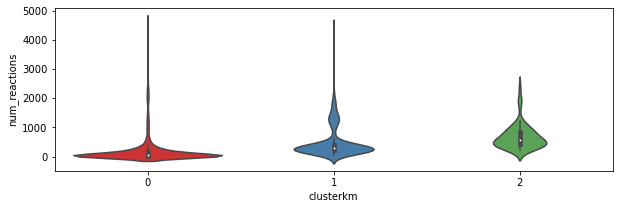

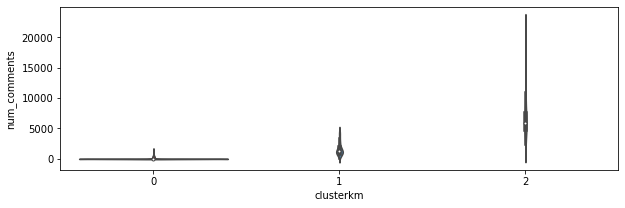

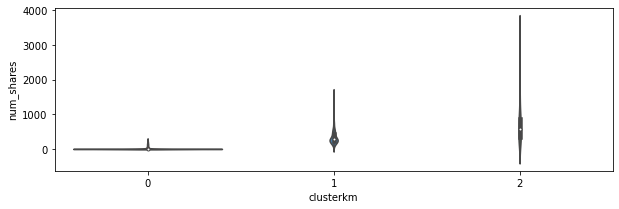

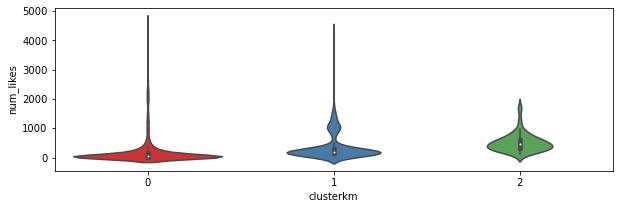

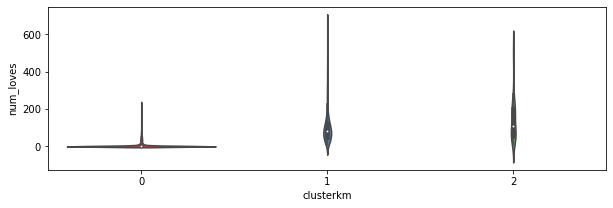

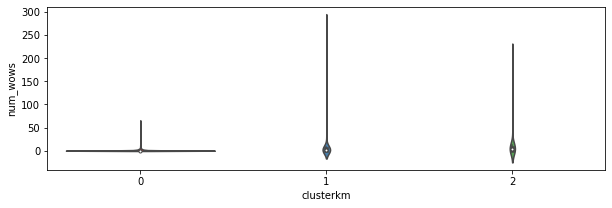

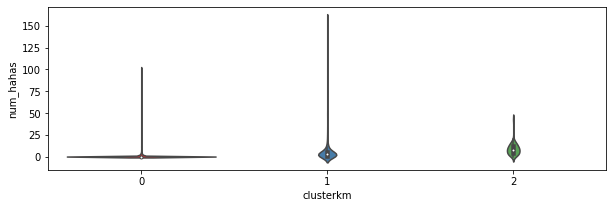

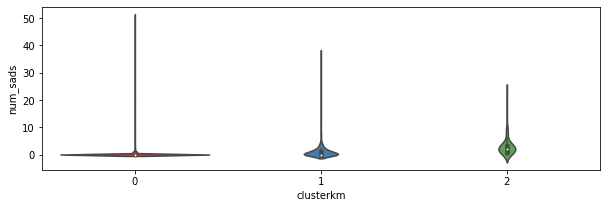

In [44]:
# agafem les columnes per fer l'estudi gràfic:
columns=fbthai_data1.columns[0:9]
# Generar els gràfics de violí
for i in columns:
    plt.figure(figsize=(10, 3))
    plt.tight_layout()
    plt.gca().set(xlabel=i, ylabel='Frequència')
    sns.violinplot(x="clusterkm", y=i, data=fbthai_data1, palette=sns.color_palette("Set1", len(fbthai_data1[i].unique())))
    plt.show()


Amb la exploració gràfica per clusters podem veure que el cluster 0, ens dona una informació molt similar als boxplots estudiats anteriorment, mostra que gairebé totes les variables tenen outliers i els valors estàn molt concentrats. 

In [45]:
fbthai_data1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,postid_614855718638584,postid_725980084255106,postid_819700534875473,postid_848451358648417,Saturday,Sunday,Workday,time_day,year,clusterkm
0,video,529,512,262,432,92,3,1,1,0,...,0,0,0,0,0,1,0,night,2018,1
1,photo,150,0,0,150,0,0,0,0,0,...,0,0,0,0,1,0,0,afternoon/evening,2018,0
2,video,227,236,57,204,21,1,1,0,0,...,0,0,0,0,1,0,0,night,2018,0
3,photo,111,0,0,111,0,0,0,0,0,...,0,0,0,0,1,0,0,night,2018,0
4,photo,213,0,0,204,9,0,0,0,0,...,0,0,0,0,0,0,1,night,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,...,0,0,0,0,1,0,0,night,2016,0
7046,photo,16,0,0,14,1,0,1,0,0,...,0,0,0,0,0,0,1,morning,2016,0
7047,photo,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,night,2016,0
7048,photo,351,12,22,349,2,0,0,0,0,...,0,0,0,0,0,0,1,night,2016,0


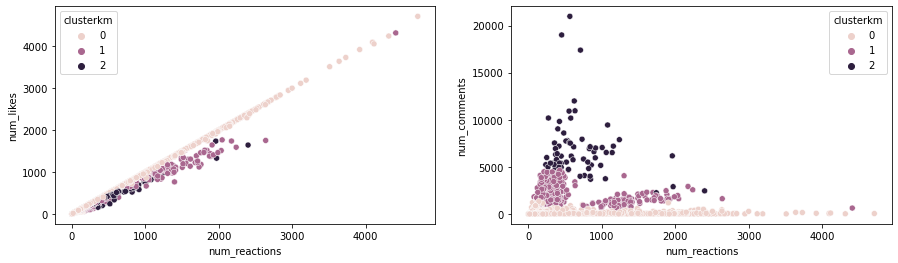

In [46]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)  # Primer gràfic
sns.scatterplot(x='num_reactions', y='num_likes', data=fbthai_data1, hue='clusterkm')
plt.subplot(1, 2, 2)  # Segon gràfic
sns.scatterplot(x='num_reactions', y='num_comments', data=fbthai_data1, hue='clusterkm')

plt.show()

Aqui podem veure per exemple, la relació entre dos de les variables : el número de reaccions i el número de likes que ja haviem vist que estaven fortament correlacionades. I aqui es veu clarament una relació lineal. Tantmateix podem veure que el cluster 0 del algoritme k-means es el que dona millors resultats amb els components principals (PCA).

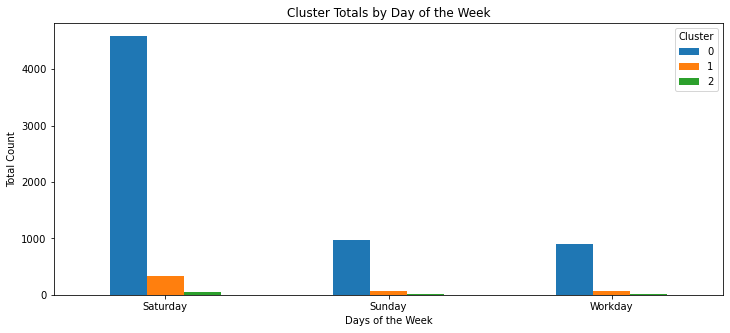

In [47]:
dataday = fbthai_data1.groupby(['Saturday', 'Sunday', 'Workday'])['clusterkm'].value_counts().unstack().fillna(0)

fig, axs = plt.subplots(figsize=(12, 5))

dataday.plot(kind='bar', ax=axs)
axs.set_xticklabels(['Saturday', 'Sunday', 'Workday'], rotation=0)
axs.set_xlabel('Days of the Week')
axs.set_ylabel('Total Count')
axs.set_title('Cluster Totals by Day of the Week')
axs.legend(title='Cluster')

plt.show()

De nou veiem que els clusters funcionen i ens donen una informació similar a la vista anteriorment.
Dissabte és el dia amb mes interaccions.I serà el mateix amb les altres variables categòriques estudiades. Sembla que amb aquest algoritme s'ajusta una mica mes a les dades graficades observades simplement amb el groupby de tota la base de dades.

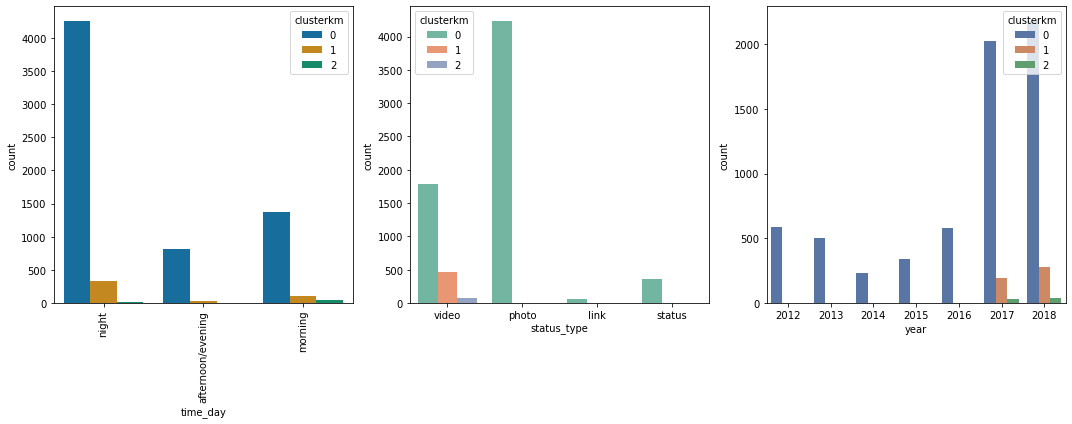

In [48]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
ax = sns.countplot(x="time_day", hue="clusterkm", data=fbthai_data1, palette="colorblind")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.subplot(1, 3, 2)
sns.countplot(x="status_type", hue="clusterkm", data=fbthai_data1, palette="Set2")
plt.subplot(1, 3, 3)
sns.countplot(x="year", hue="clusterkm", data=fbthai_data1, palette="deep")
plt.tight_layout()  
plt.show()



## Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.


In [49]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Tinc les dades ja preprocessades, però necessito saber quin seria el nro de clusters òptim. Determinar el número de clusters desitjats en un algorisme de clustering jeràrquic pot ser un desafiament. No hi ha una manera definitiva de trobar el nombre òptim de clusters, ja que depèn del conjunt de dades i del context del problema. No obstant això amb el **Mètode del dendrograma**: El dendrograma mostra la jerarquia de clusters a mesura que es van fusionant. S'observen les distàncies en l'eix vertical del dendrograma i es busquen les distàncies més grans entre les unions de clusters. Aquesta pot ser una indicació del nombre de clusters adequat. Es pot utilitzar un tall horitzontal en el dendrograma per determinar el nombre de clusters.
Generaré un dendrograma amb els últims 15 clusters fusionats per no utilitzar massa 
memòria i temps de processament i tenir una visió mes clara. 

Observem la distància entre les fusions successives de clusters en el dendrograma i cerquem un punt on aquesta distància disminueix significativament. Aquest punt indica un canvi substancial en la estructura dels clústers. Pots triar aquest punt com el nombre òptim de clústers.

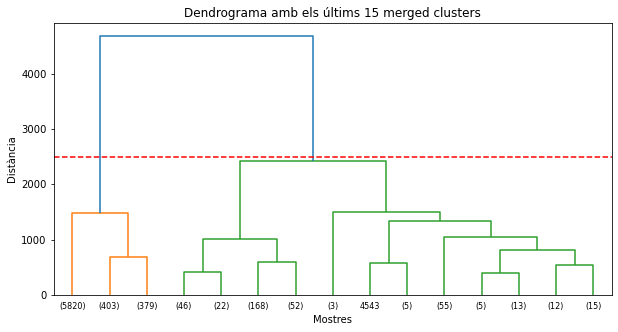

Nombre de clusters: 2


In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Càlcul de la matriu de vincles
Z = linkage(fb_thai_pca.values, method='ward')
p = 15  # Nombre de merged clusters a mostrar
plt.figure(figsize=(10, 5))
dendrogram(Z,leaf_font_size=8,truncate_mode='lastp', p=p)
# Determinem el punt de tall automàtic per obtenir els clusters
max_d = 2500  # Valor de tall desitjat
clusters = fcluster(Z, max_d, criterion='distance')
plt.axhline(y=max_d, color='r', linestyle='--')  # Línia horitzontal del punt de tall
plt.title('Dendrograma amb els últims 15 merged clusters')
plt.xlabel('Mostres')
plt.ylabel('Distància')
plt.show()

# Nombre de clusters determinat pel punt de tall
num_clusters = len(set(clusters))
print("Nombre de clusters:", num_clusters)


En el dendrograma, les mostres es troben a l'eix x i les distàncies a l'eix y. Podem seleccionar el nombre de clusters desitjats mirant les distàncies més grans entre les unions de clusters i traçant una línia horitzontal. Els clusters seran les agrupacions de mostres sota aquesta línia..
Aquest mètode és exploratori i subjecte a interpretació. L'elecció del nombre de clusters depèn de la vostra interpretació del dendrograma i de les vostres necessitats específiques.

**Clustering jeràrquic aglomeratiu**
Agrupa les dades a partir de la proximitat entre elles. Aquest mètode comença considerant cada punt de les dades com a un cluster individual i, a continuació, va fusionant iterativament els clusters més propers fins a obtenir un únic cluster que conté totes les dades.

In [51]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(fb_thai_pca)
clusterHyer = model.labels_
clusterHyer


array([1, 1, 1, ..., 1, 1, 1])

In [52]:
fbthai_data1['ClusterHyer'] = clusterHyer
fbthai_data1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,postid_725980084255106,postid_819700534875473,postid_848451358648417,Saturday,Sunday,Workday,time_day,year,clusterkm,ClusterHyer
0,video,529,512,262,432,92,3,1,1,0,...,0,0,0,0,1,0,night,2018,1,1
1,photo,150,0,0,150,0,0,0,0,0,...,0,0,0,1,0,0,afternoon/evening,2018,0,1
2,video,227,236,57,204,21,1,1,0,0,...,0,0,0,1,0,0,night,2018,0,1
3,photo,111,0,0,111,0,0,0,0,0,...,0,0,0,1,0,0,night,2018,0,1
4,photo,213,0,0,204,9,0,0,0,0,...,0,0,0,0,0,1,night,2018,0,1


In [53]:
fbthai_data1['ClusterHyer'].value_counts()

1    6602
0     397
Name: ClusterHyer, dtype: int64

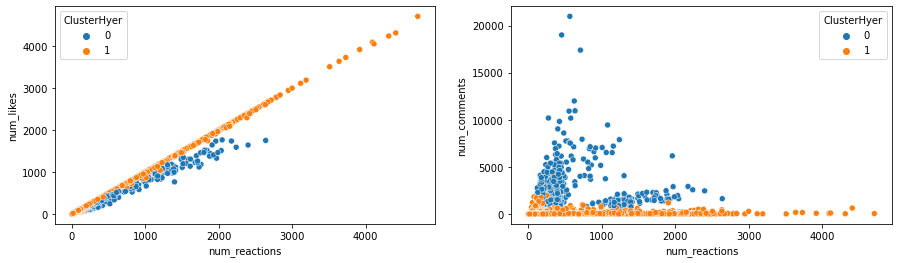

In [54]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)  # Primer gràfic
sns.scatterplot(x='num_reactions', y='num_likes', data=fbthai_data1, hue='ClusterHyer')
plt.subplot(1, 2, 2)  # Segon gràfic
sns.scatterplot(x='num_reactions', y='num_comments', data=fbthai_data1, hue='ClusterHyer')

plt.show()

Veiem de nou graficament com es comporten les mostres als clusters i com la clusterització influeix a la relació entre elles.

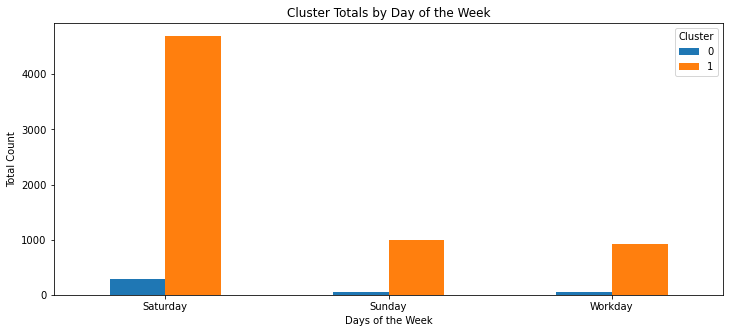

In [55]:
dataday = fbthai_data1.groupby(['Saturday', 'Sunday', 'Workday'])['ClusterHyer'].value_counts().unstack().fillna(0)

fig, axs = plt.subplots(figsize=(12, 5))

dataday.plot(kind='bar', ax=axs)
axs.set_xticklabels(['Saturday', 'Sunday', 'Workday'], rotation=0)
axs.set_xlabel('Days of the Week')
axs.set_ylabel('Total Count')
axs.set_title('Cluster Totals by Day of the Week')
axs.legend(title='Cluster')

plt.show()

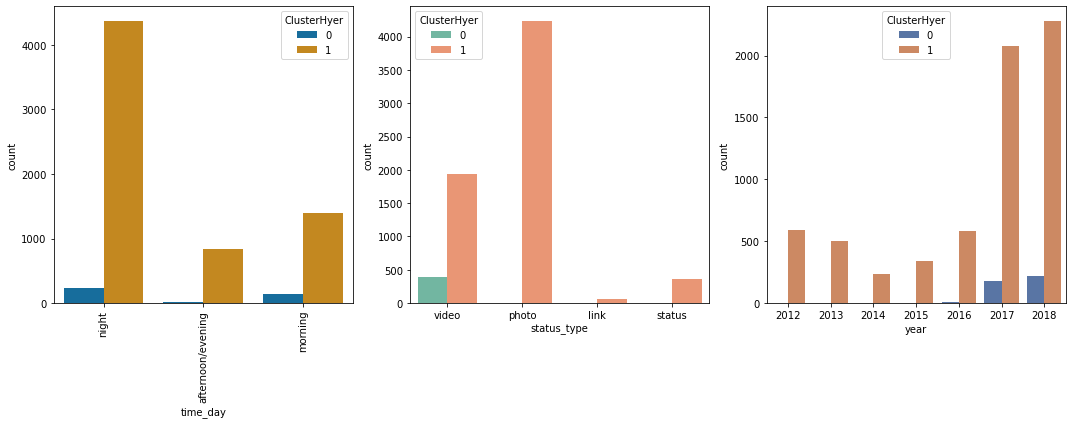

In [56]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
ax = sns.countplot(x="time_day", hue="ClusterHyer", data=fbthai_data1, palette="colorblind")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.subplot(1, 3, 2)
sns.countplot(x="status_type", hue="ClusterHyer", data=fbthai_data1, palette="Set2")
plt.subplot(1, 3, 3)
sns.countplot(x="year", hue="ClusterHyer", data=fbthai_data1, palette="deep")
plt.tight_layout()  
plt.show()

## Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [57]:
from sklearn.metrics import silhouette_score

# Calculem el rendiment amb silhouette scores per cada algoritme
kmeans_silhouette = silhouette_score(fb_thai_pca, y_pred)
agglo_silhouette = silhouette_score(fb_thai_pca, clusterHyer)

print("Rendiment Kmeans: {:.2f}%".format(kmeans_silhouette * 100))
print("Rendiment Hierarchicalt: {:.2f}%".format(agglo_silhouette * 100))


Rendiment Kmeans: 87.65%
Rendiment Hierarchicalt: 89.32%


- Veiem que els clusters jerarquics donen lleugerament millor resultat que els Kmeans.Mirem si hem utilitzat els clusters correctes

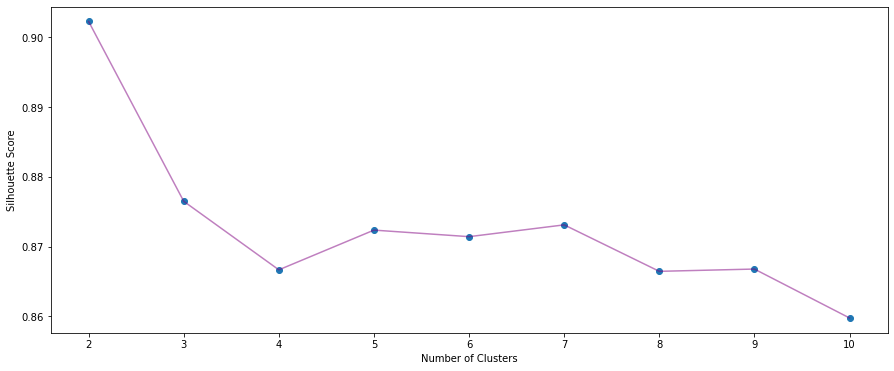

In [62]:
## Grafiquem el scoring amb Silhouette per Kmeans amb el mateix random state
ss_all = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 35))
    predict = km.fit_predict(fb_thai_pca)
    score = silhouette_score(X = fb_thai_pca, labels = predict)
    ss_all.append(score)
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'o')
#plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined") ##plot with label
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'purple')
#plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

In [63]:
# Calculate silhouette score
ss_all = []
for n in range(2, 11):
    ac = (AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward'))
    predict = ac.fit_predict(fb_thai_pca)
    score = silhouette_score(X = fb_thai_pca, labels = predict)
    ss_all.append(score)

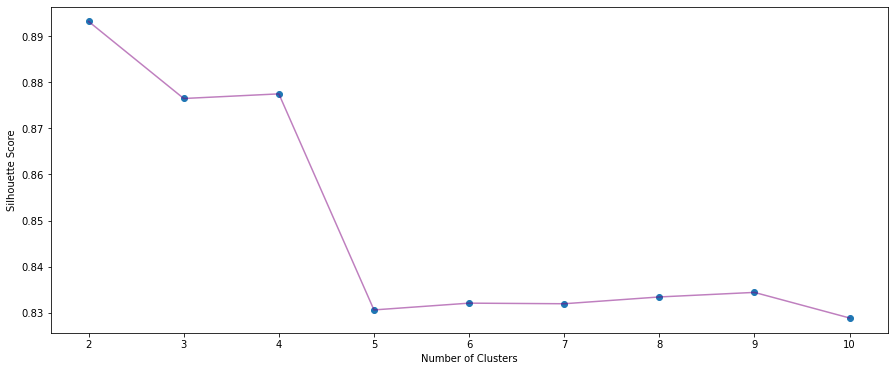

In [64]:
# Plot the number of clusters vs the silhouette score for the dataset.
##from https://statisticallyrelevant.com/k-means-clustering-in-python/
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'o')
#plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined") ##plot with label
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'purple')
#plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

- Veiem que en els dos casos hem aplicat el nro correcte de clusters per tenir el millor rendiment. 
- L'algorisme K-means es fa servir amb dades numériques continues i  agrupa observacions en clusters basats en la seva similitut. No obstant, quan es treballa amb bases de dades que contenen variables categòriques, l'algorisme K-means no es apropiat, ja que no pot treballar amb aquests tipus de dades. El K-modes es útil quan es treballa amb bases de dades que contenen variables categóriques, ja que pot agrupar correctament les observacions en funció de la similitut en les variables categòriques.

Kmodes no funciona amb PCA ja que es per variables categoriques, es podria provar de fer kmodes per les categóriques i obtenir una visió global de la segmentació.